In [6]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests, bs4
import time
from  sklearn import model_selection
from  collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [7]:
#load and view data
df = pd.read_csv('msc_appel_data.csv', sep='\t', index_col='num')
df.head(12)

,year,month,total_appeals,appeals_to_mayor,res_positive,res_explained,res_negative,El_form_to_mayor,Pap_form_to_mayor,to_10K_total_VAO,...,to_10K_total_TiNAO,to_10K_mayor_TiNAO,to_10K_total_CAO,to_10K_mayor_СAO,to_10K_total_YUAO,to_10K_mayor_YUAO,to_10K_total_YUVAO,to_10K_mayor_YUVAO,to_10K_total_YUZAO,to_10K_mayor_YUZAO
num,,,,,,,,,,,,,,,,,,,,,
1,2016,January,79217,22110,26950,42764,6405,19418,2692,44,...,56,22,73,28,35,11,39,12,44,14
2,2016,February,102704,26736,30071,59325,8239,22846,3890,54,...,67,24,94,30,46,13,55,16,59,18
3,2016,March,112527,26972,30820,67568,8435,22250,4722,62,...,72,27,103,33,51,13,58,15,63,18
4,2016,April,121050,30179,31289,75471,8359,26086,4093,67,...,79,35,106,34,54,15,63,17,68,17
5,2016,May,119504,40300,26433,80753,6969,22677,17623,65,...,71,29,122,54,52,18,60,20,70,25
6,2016,June,112513,29752,27410,71508,6435,19125,10627,62,...,67,23,100,34,46,12,56,14,58,15
7,2016,July,99982,23071,25944,62916,5444,19002,4069,58,...,68,28,97,30,45,11,54,13,57,12
8,2016,August,114670,25180,30761,70034,6098,19967,5213,65,...,80,28,105,29,54,12,63,13,65,12
9,2016,September,118274,28483,31365,74577,6019,22237,6246,67,...,72,31,114,33,51,12,70,18,67,15


Опишем информацию из датафрейма:

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 1 to 22
Data columns (total 31 columns):
year                  22 non-null int64
month                 22 non-null object
total_appeals         22 non-null int64
appeals_to_mayor      22 non-null int64
res_positive          22 non-null int64
res_explained         22 non-null int64
res_negative          22 non-null int64
El_form_to_mayor      22 non-null int64
Pap_form_to_mayor     22 non-null int64
to_10K_total_VAO      22 non-null int64
to_10K_mayor_VAO      22 non-null int64
to_10K_total_ZAO      22 non-null int64
to_10K_mayor_ZAO      22 non-null int64
to_10K_total_ZelAO    22 non-null int64
to_10K_mayor_ZelAO    22 non-null int64
to_10K_total_SAO      22 non-null int64
to_10K_mayor_SAO      22 non-null int64
to_10K_total_SVAO     22 non-null int64
to_10K_mayor_SVAO     22 non-null int64
to_10K_total_SZAO     22 non-null int64
to_10K_mayor_SZAO     22 non-null int64
to_10K_total_TiNAO    22 non-null int64
to_10K_mayor_TiN

Найдем линейную кореляцию между первыми семью столбцами:

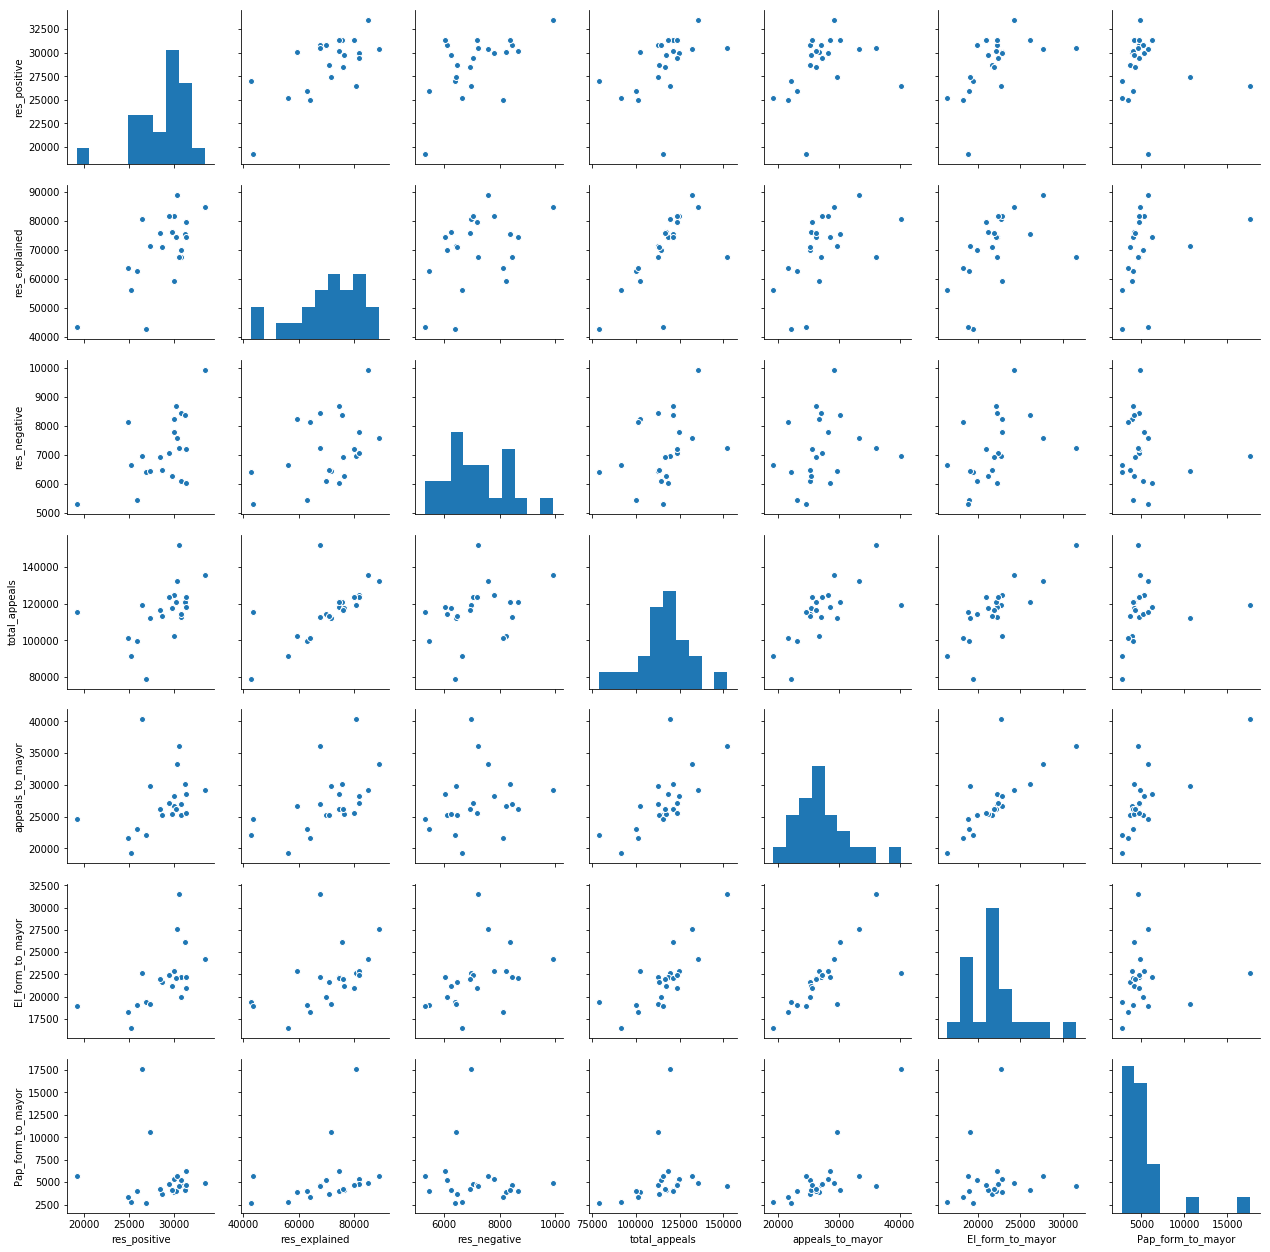

In [24]:
columns_to_show = ['res_positive', 'res_explained', 'res_negative',
                   'total_appeals', 'appeals_to_mayor','El_form_to_mayor', 'Pap_form_to_mayor']
data=df[columns_to_show]
grid = sns.pairplot(df[columns_to_show])

Точки выстроились почти в ровную линию. Проверим коэффициент кореляции:

In [8]:
print("Correlation coefficient for a explained review result to the total number of appeals =",
       df.res_explained.corr(df.total_appeals) )
print("Corr.coeff. for a  total number of appeals to mayor to the total number of appeals to mayor in electronic form =",
       df.appeals_to_mayor.corr(df.El_form_to_mayor) )

Correlation coefficient for a explained review result to the total number of appeals = 0.674507032284203
Corr.coeff. for a  total number of appeals to mayor to the total number of appeals to mayor in electronic form = 0.7420107663170155


Количество различных ответов за весь период:

Text(0.5,1,'Answer')

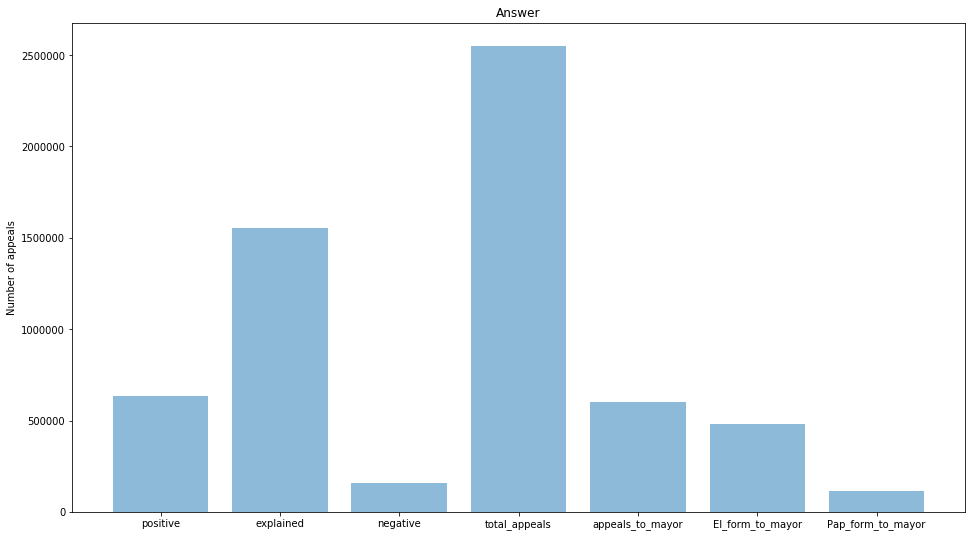

In [43]:
district_columns = ['res_positive', 'res_explained', 'res_negative',
                   'total_appeals', 'appeals_to_mayor','El_form_to_mayor', 'Pap_form_to_mayor']
y_pos = np.arange(len(district_columns))

short_district_columns=district_columns.copy()
for i in range(len(short_district_columns)):
    short_district_columns[i] = short_district_columns[i].replace('res_','')

distr_sum = df[district_columns].sum()

plt.figure(figsize=(16,9))
plt.bar(y_pos, distr_sum, align='center', alpha=0.5)

plt.xticks(y_pos, short_district_columns)
plt.ylabel('Number of appeals')
plt.title('Answer')

Посмотрим активность людей из разных областей Москвы:

In [9]:
district_columns = ['to_10K_total_VAO', 'to_10K_total_ZAO', 'to_10K_total_ZelAO',        'to_10K_total_SAO','to_10K_total_SVAO','to_10K_total_SZAO','to_10K_total_TiNAO','to_10K_total_CAO', 'to_10K_total_YUAO','to_10K_total_YUVAO','to_10K_total_YUZAO']

Text(0.5,1,'Number of appeals per 10,000 people for all time')

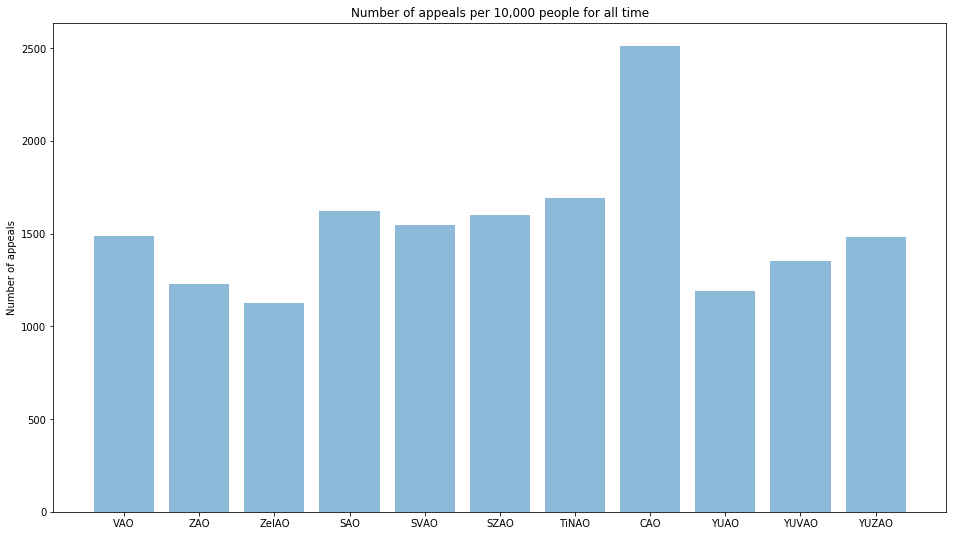

In [25]:
y_pos = np.arange(len(district_columns))

short_district_columns=district_columns.copy()
for i in range(len(short_district_columns)):
    short_district_columns[i] = short_district_columns[i].replace('to_10K_total_','')

distr_sum = df[district_columns].sum()

plt.figure(figsize=(16,9))
plt.bar(y_pos, distr_sum, align='center', alpha=0.5)

plt.xticks(y_pos, short_district_columns)
plt.ylabel('Number of appeals')
plt.title('Number of appeals per 10,000 people for all time')


Покажем барчарт в зависимости от количества людей, проживающих в этих облостях Москвы:

Text(0.5,1,'Number of appeals per total pщulation of district for all time')

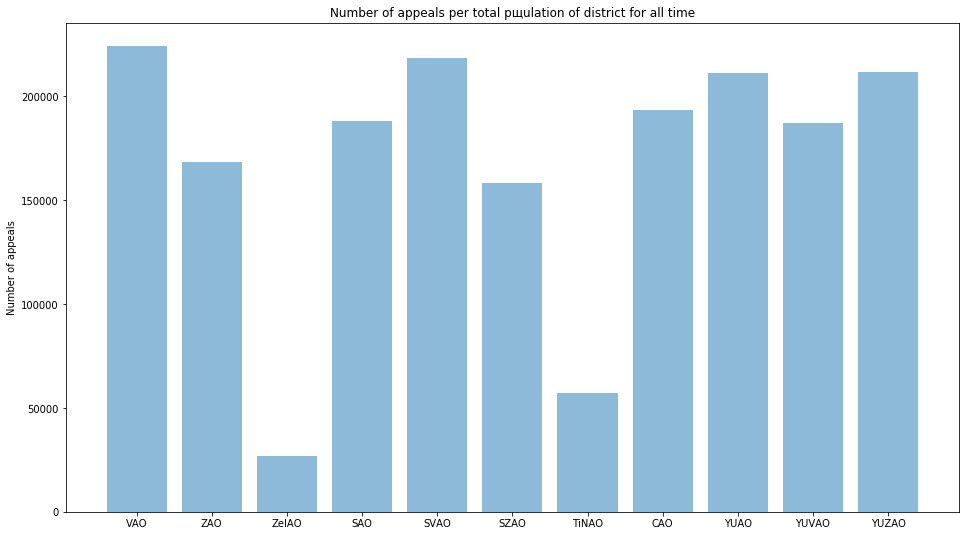

In [11]:
# we will collect the data manually from 
#https://ru.wikipedia.org/wiki/%D0%90%D0%B4%D0%BC%D0%B8%D0%BD%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE-%D1%82%D0%B5%D1%80%D1%80%D0%B8%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B

#the data is filled in the same order as the district_columns
district_population=[1507198,1368731,239861,1160576,1415283,990696,339231,769630,1776789,1385385,1427284]

#transition from 1/10000 to citizens' appeal to the entire population of the district
total_appel_dep=district_population*distr_sum/10000

plt.figure(figsize=(16,9))
plt.bar(y_pos, total_appel_dep, align='center', alpha=0.5)
plt.xticks(y_pos, short_district_columns)
plt.ylabel('Number of appeals')
plt.title('Number of appeals per total pщulation of district for all time')

Покажем основные статистические характеристики данных по каждому числовому признаку (типы int64 и  float64): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [12]:
df.describe()

,year,total_appeals,appeals_to_mayor,res_positive,res_explained,res_negative,El_form_to_mayor,Pap_form_to_mayor,to_10K_total_VAO,to_10K_mayor_VAO,...,to_10K_total_TiNAO,to_10K_mayor_TiNAO,to_10K_total_CAO,to_10K_mayor_СAO,to_10K_total_YUAO,to_10K_mayor_YUAO,to_10K_total_YUVAO,to_10K_mayor_YUVAO,to_10K_total_YUZAO,to_10K_mayor_YUZAO
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2016.454545,115906.227273,27307.863636,28760.772727,70520.000000,7161.181818,21988.227273,5320.136364,67.636364,16.590909,...,76.909091,29.727273,114.181818,32.818182,54.000000,12.818182,61.409091,18.227273,67.363636,15.909091
std,0.509647,15204.896395,4729.292289,3079.162841,12082.259746,1138.601215,3310.703895,3176.749496,10.860788,3.142021,...,12.062966,8.767808,19.965772,6.609058,8.949594,2.648204,9.454951,13.752686,9.702947,3.421349
min,2016.000000,79217.000000,19192.000000,19225.000000,42764.000000,5303.000000,16447.000000,2692.000000,44.000000,10.000000,...,56.000000,18.000000,73.000000,22.000000,35.000000,7.000000,39.000000,9.000000,44.000000,9.000000
25%,2016.000000,112516.500000,25206.250000,27065.000000,64856.750000,6412.500000,19555.250000,4065.250000,62.000000,15.000000,...,68.500000,24.250000,100.750000,29.250000,50.250000,11.250000,55.250000,14.000000,60.000000,14.000000
50%,2016.000000,117077.500000,26458.500000,29889.000000,73041.500000,7009.000000,22029.500000,4598.500000,66.000000,16.000000,...,76.500000,28.000000,111.500000,32.500000,54.000000,12.000000,60.000000,14.000000,67.500000,16.000000
75%,2017.000000,122903.250000,28977.250000,30707.000000,78940.250000,8034.000000,22803.750000,5310.500000,73.500000,18.000000,...,82.250000,32.500000,127.750000,34.000000,56.000000,14.500000,65.250000,18.000000,73.250000,18.000000
max,2017.000000,152210.000000,40300.000000,33418.000000,88947.000000,9924.000000,31504.000000,17623.000000,92.000000,24.000000,...,101.000000,51.000000,150.000000,54.000000,74.000000,18.000000,80.000000,78.000000,88.000000,25.000000


In [ ]:
Заменим названия месяцов на их прямые даты:

In [16]:
df2=df.copy()

#Let's make a separate column for each value of our categorical variable
df2=pd.get_dummies(df2,prefix=['month'])

In [15]:
#Let's code the month with numbers
d={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
month=df.month.map(d)

#We paste the information about the date from several columns
dt=list()
for year,mont in zip(df2.year.values, month.values):
    s=str(year)+' '+str(mont)+' 1'
    dt.append(s)
#convert the received data into the DateTime type and replace them with a column year      
df2.rename(columns={'year': 'DateTime'}, inplace=True)
df2['DateTime']=pd.to_datetime(dt, format='%Y %m %d')

df2.head(5)

,DateTime,total_appeals,appeals_to_mayor,res_positive,res_explained,res_negative,El_form_to_mayor,Pap_form_to_mayor,to_10K_total_VAO,to_10K_mayor_VAO,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
num,,,,,,,,,,,,,,,,,,,,,
1,2016-01-01,79217,22110,26950,42764,6405,19418,2692,44,14,...,0,0,1,0,0,0,0,0,0,0
2,2016-02-01,102704,26736,30071,59325,8239,22846,3890,54,15,...,0,1,0,0,0,0,0,0,0,0
3,2016-03-01,112527,26972,30820,67568,8435,22250,4722,62,16,...,0,0,0,0,0,1,0,0,0,0
4,2016-04-01,121050,30179,31289,75471,8359,26086,4093,67,17,...,0,0,0,0,0,0,0,0,0,0
5,2016-05-01,119504,40300,26433,80753,6969,22677,17623,65,24,...,0,0,0,0,0,0,1,0,0,0


Какова доля положительных ответов от всего датафрейма:

In [22]:
df['res_positive'].mean()

28760.772727272728

Визуализируем попарные зависимости между признаками (количество писем, положительных ответов,отрицатеьных,отписаных:

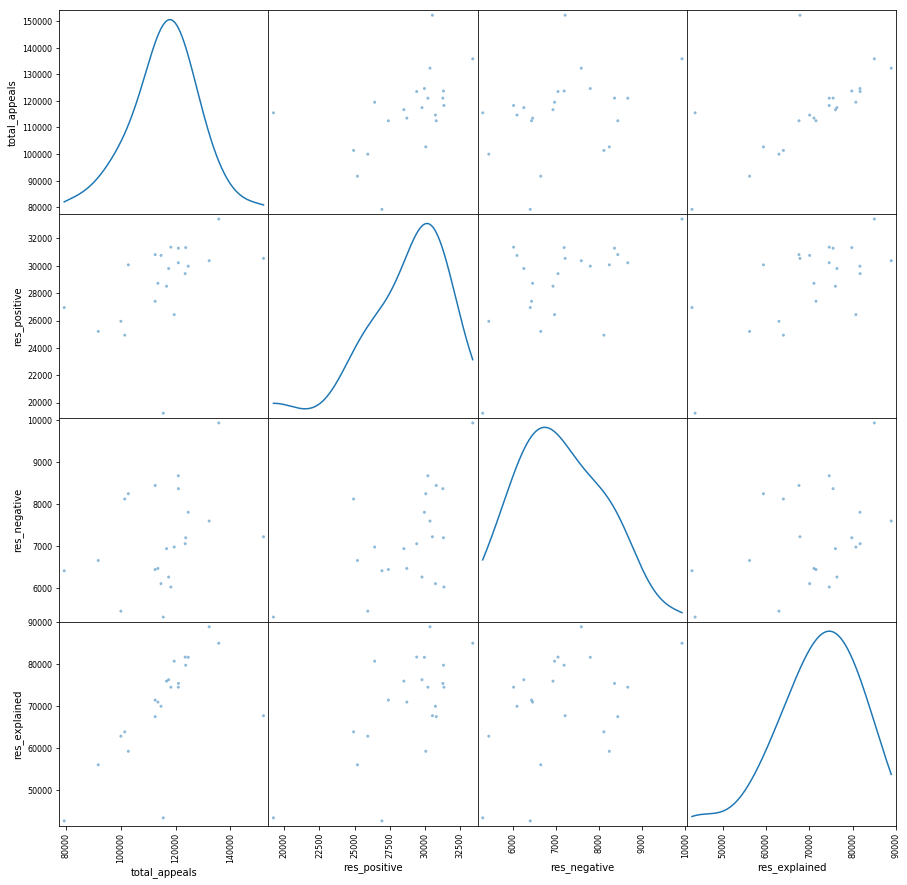

In [31]:
pd.scatter_matrix(df[['total_appeals', 'res_positive','res_negative', 'res_explained']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

Для каждого признака построим гистограмму для наглядности:

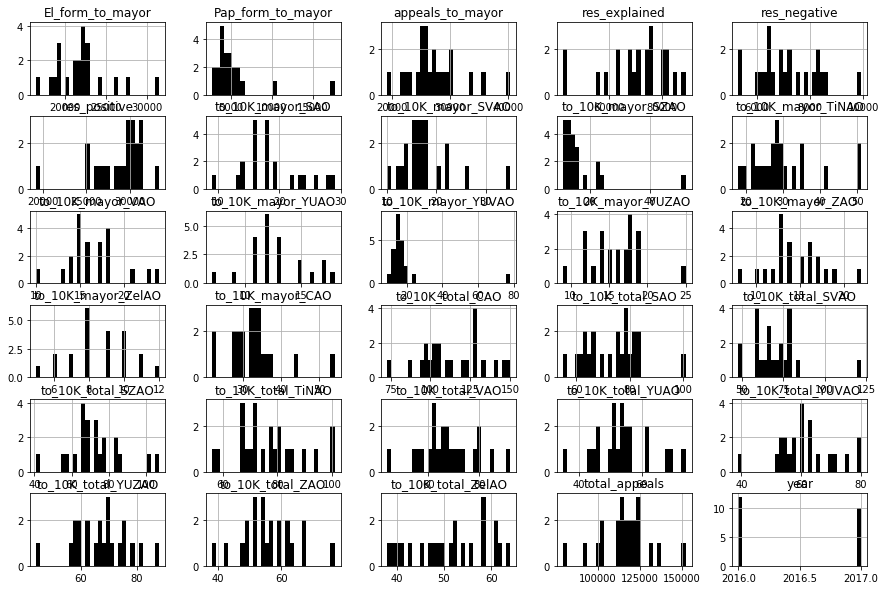

In [32]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()